In [2]:
from pyspark.sql.types import StructType, StructField, StringType, FloatType, LongType, IntegerType, BooleanType

types = {
    'Float': lambda: FloatType(),
    'Integer': lambda: LongType(),
    'Long': lambda: LongType(),
    'Bool': lambda: IntegerType()
}

feats = []
with open('../CSV.header.txt') as header_file:
    for lineno, line in enumerate(header_file):
        line = line.strip()
        if ':' in line:
            feat_name, type_name = line.split(':')
            feats.append(StructField(feat_name, types[type_name](), True))
        else:
            feats.append(StructField(line, StringType(), True))
            
schema = StructType(feats)
feats

[StructField(GLOBALEVENTID,LongType,true),
 StructField(SQLDATE,LongType,true),
 StructField(MonthYear,LongType,true),
 StructField(Year,LongType,true),
 StructField(FractionDate,FloatType,true),
 StructField(Actor1Code,StringType,true),
 StructField(Actor1Name,StringType,true),
 StructField(Actor1CountryCode,StringType,true),
 StructField(Actor1KnownGroupCode,StringType,true),
 StructField(Actor1EthnicCode,StringType,true),
 StructField(Actor1Religion1Code,StringType,true),
 StructField(Actor1Religion2Code,StringType,true),
 StructField(Actor1Type1Code,StringType,true),
 StructField(Actor1Type2Code,StringType,true),
 StructField(Actor1Type3Code,StringType,true),
 StructField(Actor2Code,StringType,true),
 StructField(Actor2Name,StringType,true),
 StructField(Actor2CountryCode,StringType,true),
 StructField(Actor2KnownGroupCode,StringType,true),
 StructField(Actor2EthnicCode,StringType,true),
 StructField(Actor2Religion1Code,StringType,true),
 StructField(Actor2Religion2Code,StringType,

In [32]:
df = spark.read.csv('/home/ubuntu/data-p3-d2/2015-unzip/2015*.gz', sep = '\t', schema=schema)
#df = spark.read.csv('/home/ubuntu/data-p3-d2/2016-unzip/2016*.gz', sep = '\t', schema=schema)


In [33]:
from pyspark import SparkContext

df.createOrReplaceTempView("GDELT")

<h2>Happiness and Sadness of US population In 2015 and 2016</h2>
<h3>What is</h3>
<p>The attributes that are specific to this analysis are 'AvgTone' representing 'emotion/sentiment', 'EventRootCode' representing 'the root-level
category of events', 'EventBaseCode' representing 'event character' and ActionGeo_CountryCode="US" representing 'United State of America'</p>
<body>
    <center><h4>The most negative AvgTone</h4></center>
<table>
<tr>
    <th>
        Year
    </th>
    <th>
        EventRootCode
    </th>
    <th>
        Event
    </th>
     <th>
        EventBaseCode
    </th>
    <th>
        Event
    </th>
    <th>
        AvgTone
    </th>
      <th>
       Source URL
    </th>
</tr>
<tr>
    <td>
        2015
    </td>
    <td>
        17
    </td>
    <td>
      COERCE
    </td>
     <td>
        173
    </td>
    <td>
        "Oxford County Superior Court"
        Arrest, detain. Legal or extrajudicial arrests, detentions, or imprisonments.Use this code for both criminal and political detentions.
    </td>
    <td> 
       -35.064934 
    </td>
    <td>
        http://www.sunjournal.com/oxford-county-superior-court-11/
    </td>
    </tr>
    <tr>
    <td>
        2016
    </td>
    <td>
        18
    </td>
    <td>
        ASSAULT
    </td>
     <td>
        182
    </td>
    <td>
        "Trump Steals Jeb's Strategy, Tries to Win the Republican Primary Without the Base"
        Physically assault, attack physical well-being of individuals without the use of weaponry.
    </td>
    <td> 
       -59.471684 
    </td>
    <td>
       http://freerepublic.com/focus/f-news/3398001/posts
    </td>
    </tr>
</table>
        <center><h4>The most postitive Avgtone</h4></center>
<table>
<tr>
     <th>
        Year
    </th>
    <th>
        EventRootCode
    </th>
    <th>
        Event
    </th>
    <th>
        EventBaseCode
    </th>
    <th>
        Event
    </th>
    <th>
        AvgTone
    </th>
    <th>
        Source URL
    </th>
</tr>
<tr>
     <td>
        2015
    </td>
    <td>
        7
    </td>
    <td>
       PROVIDE AID
    </td>
    <td>
        070
    </td>
    <td>
        "SD Performing Arts League will honor volunteers at a special ceremony"
         Provide aid, not specified below. All provisions, extension of material aid, not otherwise specified.
    </td>
    <td> 
       24.242424 
    </td>
    <td>
       http://www.sandiegoreader.com/news/2015/jan/17/theater-stars-2014/
    </td>
    </tr>
    <tr>
     <td>
        2016
    </td>
    <td>
        05
    </td>
    <td>
       ENGAGE IN DIPLOMATIC COOPERATION
    </td>
    <td>
    051
    </td>
    <td>
       Wegner Winners Share Leadership Advice
        Praise or endorse. Express support for, commend, approve policy, action, or actor.
    </td>
    <td> 
        24.444445
    </td>
    <td>
      http://news.cuna.org/articles/109270-wegner-winners-share-leadership-advice
    </td>
    </tr>
</table>
</body>

In [ ]:
th_avgtone=spark.sql('SELECT AVG(AvgTone) as Avg_Avgtone,EventRootCode from GDELT WHERE ActionGeo_CountryCode="US" group by EventRootCode order by Avg_Avgtone DESC Limit 5').show()
th_avgtone
max_avgtone=spark.sql('SELECT max(AvgTone),EventRootCode from GDELT WHERE ActionGeo_CountryCode="US" group by EventRootCode').show()
max_avgtone
min_avgtone=spark.sql('SELECT min(AvgTone),EventRootCode from GDELT WHERE ActionGeo_CountryCode="US" group by EventRootCode').show()
min_avgtone

In [46]:
most_avgtone=spark.sql('select Actor1Name,AvgTone,EventBaseCode,EventRootCode,SOURCEURL from GDELT where ActionGeo_CountryCode="US" order by AvgTone DESC').show(10,False)
most_avgtone

+--------------------+---------+-------------+-------------+-------------------------------------------------------------------------------------------------------------------------------------------+
|Actor1Name          |AvgTone  |EventBaseCode|EventRootCode|SOURCEURL                                                                                                                                  |
+--------------------+---------+-------------+-------------+-------------------------------------------------------------------------------------------------------------------------------------------+
|CANADA              |29.84429 |051          |05           |https://en.wikinews.org/wiki/Dial=sage=50=canada=support=number=1~844~313~4859=sage=instant=payroll=helpline=SAGE=50=premium=support=number|
|CITIZEN             |25.0     |043          |04           |https://www.yahoo.com/news/media-receive-brotherly-love-democratic-042741452.html                                                       

In [45]:
less_avgtone=spark.sql('select Actor1Name,AvgTone,EventRootCode,EventBaseCode,SOURCEURL from GDELT where ActionGeo_CountryCode="US" order by AvgTone ASC').show(20,False)
less_avgtone

+--------------+----------+-------------+-------------+--------------------------------------------------------------------------------------+
|Actor1Name    |AvgTone   |EventRootCode|EventBaseCode|SOURCEURL                                                                             |
+--------------+----------+-------------+-------------+--------------------------------------------------------------------------------------+
|NEW YORK      |-59.471684|18           |182          |http://freerepublic.com/focus/f-news/3398001/posts                                    |
|SOUTH CAROLINA|-59.471684|08           |084          |http://freerepublic.com/focus/f-news/3398001/posts                                    |
|PRISON        |-40.0     |19           |190          |https://www.yahoo.com/news/mother-cancer-convicted-killing-disabled-172017802.html    |
|EMPLOYEE      |-39.215687|17           |173          |https://www.yahoo.com/news/juvenile-suspect-arrested-fatal-shooting-225010116.html    |

<h2>Top Event categories that affect emotions of US 2015</h2>
<h4>Positive</h4>
<table>
<tr>
    <th>
        EventRootCode
    </th>
    <th>
        Description
    </th>
     <th>
        EventBaseCode
    </th>
    <th>
        Description
    </th>
    <th>
        AvgTone
    </th>
</tr>
<tr>
    <td>
        17
    </td>
    <td>
      COERCE
    </td>
     <td>
        173
    </td>
    <td>
        Arrest, detain. Legal or extrajudicial arrests, detentions, or imprisonments.Use this code for both criminal and political detentions.
    </td>
    <td> 
       -35.064934 
    </td>
    </tr>
</table>

<h4>Negative</h4>
<table>
<tr>
    <th>
        EventRootCode
    </th>
    <th>
        Event
    </th>
     <th>
        EventBaseCode
    </th>
    <th>
        Event
    </th>
    <th>
        AvgTone
    </th>
    
</tr>
<tr>
    <td>
        17
    </td>
    <td>
      COERCE
    </td>
     <td>
        173
    </td>
    <td>
        Arrest, detain. Legal or extrajudicial arrests, detentions, or imprisonments.Use this code for both criminal and political detentions.
    </td>
    <td> 
       -35.064934 
    </td>
    
    </tr>
</table>

In [33]:
avgtone_event=spark.sql('select AVG(AvgTone) as AVG, MonthYear from GDELT where ActionGeo_CountryCode="US" and Year = 2016 GROUP BY MonthYear order by MonthYear ASC').show()
avgtone_event

+-------------------+---------+
|                AVG|MonthYear|
+-------------------+---------+
|-1.9994269999271848|   201601|
|-1.7829663336286794|   201602|
|-1.7938048301368754|   201603|
|-1.7022404943693514|   201604|
|-1.6965580995624725|   201605|
|-1.9867764762350473|   201606|
|-2.0027614782917826|   201607|
|-1.9800258619373614|   201608|
|-1.9823759915170773|   201609|
|-1.9424180526532315|   201610|
|-1.6813309397397231|   201611|
|-1.7541623240646622|   201612|
+-------------------+---------+



In [ ]:
TH_USA = spark.sql('Select * from GDELT where (Actor1CountryCode="THA" and Actor2CountryCode="USA") or (Actor1CountryCode="USA" and Actor2CountryCode="THA") order by NumMentions DESC').show(10)
TH_USA

<h2>Top Stories of Thailand</h2>
<h4>2015</h4>
|-5.0          |3445       |2136       |http://www.canberratimes.com.au/world/police-arrest-suspect-over-bangkok-shrine-bombing-20150829-gjaraj.html   

|0.0           |3365       |3356       |http://www.echonews.com.au/news/bangkok-bombing-police-release-sketch-cctv-suspect/2746755/  

|-4.0          |3180       |3180       |http://www.montereyherald.com/arts-and-entertainment/20150520/the-latest-on-rohingya-gambia-offers-to-resettle-migrants 

|2.8           |2852       |2852       |http://www.dailyliberal.com.au/story/3532618/travel-deals-cheap-flights-with-malaysia-airlines-year-end-super-specials-sale/

<h4>2016</h4>
|-2.0          |5625       |5625       |http://www.seattletimes.com/nation-world/thais-vote-on-new-constitution-that-could-dilute-democracy/  

|4.0           |5476       |5476       |http://www.thejakartapost.com/seasia/2016/10/14/thais-gripped-by-grief-after-beloved-kings-death-.html 

|2.8           |4497       |4173       |http://m.nzherald.co.nz/travel/news/article.cfm?c_id=7&objectid=11630822

|4.0           |4104       |4104       |http://www.blacktownsun.com.au/story/3842066/last-fridge-rolls-off-the-line-at-electrolux-factory/?cs=1683 

In [31]:
top_th_event = spark.sql('select GoldsteinScale,numMentions,numArticles,SOURCEURL from GDELT where ActionGeo_CountryCode="TH" order by numMentions DESC').show(50,False)
top_th_event

+--------------+-----------+-----------+------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|GoldsteinScale|numMentions|numArticles|SOURCEURL                                                                                                                                                         |
+--------------+-----------+-----------+------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|-2.0          |5625       |5625       |http://www.seattletimes.com/nation-world/thais-vote-on-new-constitution-that-could-dilute-democracy/                                                              |
|4.0           |5476       |5476       |http://www.thejakartapost.com/seasia/2016/10/14/thais-gripped-by-grief-after-beloved-kings-death-.html                                          

<h1>Top States affecting stability of Countries and events related to it</h1>
<h2>2016</h2>


<h2>2015</h2>

In [ ]:
TH_Affect = spark.sql('select Actor1Geo_Fullname,Goldsteinscale,EventRootCode,EventBaseCode from GDELT where ActionGeo_CountryCode ="TH" and  Actor1Geo_Fullname is not NULL order by Goldsteinscale DESC')
TH_Affect.show(10,False)

In [ ]:
# split = spark.sql('select distinct(SUBSTRING_INDEX(ActionGeo_FullName, ",", 2)) AS state from GDELT where ActionGeo_CountryCode ="TH" and Actor1Geo_Fullname is not NULL')
# split.show(100,False)
split_state = spark.sql('select ActionGeo_FullName from GDELT where ActionGeo_CountryCode ="TH"')
split_state.count()

In [10]:
test_2016 = spark.sql('select  sum(Goldsteinscale) as Goldsteinscale, split(ActionGeo_FullName, ",")[1] as province from GDELT where ActionGeo_CountryCode ="TH" group by province order by Goldsteinscale ASC')
test_2016.take(5)

[Row(Goldsteinscale=-6639.099992543459, province=' Pattani'),
 Row(Goldsteinscale=-5763.899995304644, province=' Narathiwat'),
 Row(Goldsteinscale=-3216.39999371022, province=' Loei'),
 Row(Goldsteinscale=-2225.3999968469143, province=' Ang Thong'),
 Row(Goldsteinscale=-1037.0000023022294, province=' Phangnga')]

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline 

pdf1=test_2016.toPandas()

In [18]:
pdf1_5=pdf1.head(5)

pandas.core.frame.DataFrame

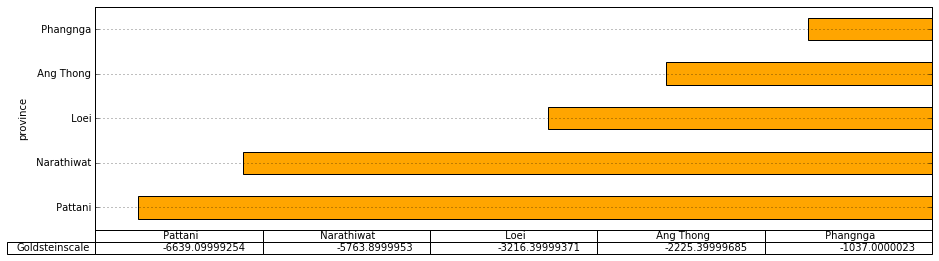

In [92]:
barh_2016=pdf1_5.plot(kind='barh',x='province',y='Goldsteinscale',color='orange',table=True,legend=None,figsize=(15,4),grid=True)
ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)

In [96]:
fig1 = barh_2016.get_figure()
fig1.savefig("image/2016.png",bbox_inches='tight')

In [34]:
test_2015 = spark.sql('select  sum(Goldsteinscale) as Goldsteinscale, split(ActionGeo_FullName, ",")[1] as province from GDELT where ActionGeo_CountryCode ="TH" group by province order by Goldsteinscale ASC')
test_2015.take(5)

[Row(Goldsteinscale=-9138.00000141561, province=' Loei'),
 Row(Goldsteinscale=-4949.7999966442585, province=' Narathiwat'),
 Row(Goldsteinscale=-3243.7999983131886, province=' Pattani'),
 Row(Goldsteinscale=-2309.4000106677413, province=' Surat Thani'),
 Row(Goldsteinscale=-982.7999975681305, province=' Nakhon Si Thammarat')]

In [ ]:
pdf2=test_2015.toPandas()
pdf2_5=pdf2.head(5)

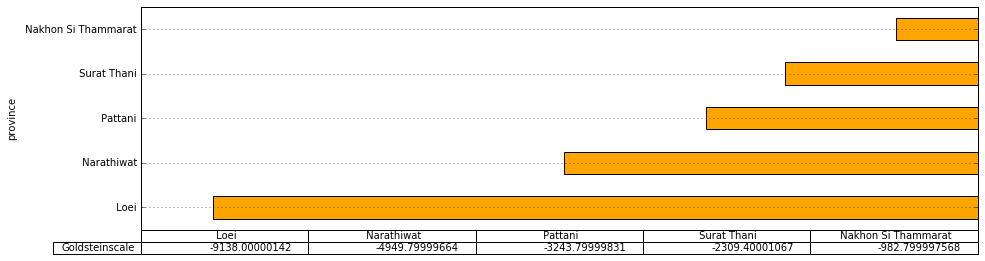

In [94]:
barh_2015=pdf2_5.plot(kind='barh',x='province',y='Goldsteinscale',color='orange',table=True,legend=None,figsize=(15,4),grid=True)
ax2 = plt.axes()
x_axis = ax2.axes.get_xaxis()
x_axis.set_visible(False)

In [95]:
fig2 = barh_2015.get_figure()
fig2.savefig("image/2015.png",bbox_inches='tight')

In [114]:
th_affect_2015 = spark.sql('select ActionGeo_FullName,EventRootCode,EventBaseCode,Goldsteinscale,SOURCEURL\
                        from GDELT where ActionGeo_CountryCode ="TH"\
                        order by Goldsteinscale ASC')
th_affect_2015.show(200,False)

+--------------------------------------------------+-------------+-------------+--------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|ActionGeo_FullName                                |EventRootCode|EventBaseCode|Goldsteinscale|SOURCEURL                                                                                                                                                                                                    |
+--------------------------------------------------+-------------+-------------+--------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|Thailand                                          |19           |190          |-10.0         

In [118]:
th_affect_2016 = spark.sql('select ActionGeo_FullName,EventRootCode,EventBaseCode,Goldsteinscale,SOURCEURL\
                        from GDELT where ActionGeo_CountryCode ="TH"\
                        order by Goldsteinscale ASC')
th_affect_2016.show(1000,False)

+--------------------------------------------------+-------------+-------------+--------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|ActionGeo_FullName                                |EventRootCode|EventBaseCode|Goldsteinscale|SOURCEURL                                                                                                                                                                                                                                  |
+--------------------------------------------------+-------------+-------------+--------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|Tha

In [ ]:
TH = spark.sql('select Goldsteinscale,EventRootCode,EventBaseCode,SUBSTRING_INDEX(Actor1Geo_Fullname, ",", 1) \
                AS state\
                from GDELT where ActionGeo_CountryCode ="TH" and  Actor1Geo_Fullname is not NULL\
                group by state \
                order by Goldsteinscale DESC')
TH.show(10,False)

In [125]:


plt.rcdefaults()
fig, ax = plt.subplots()
ax.barh(test_2015.Goldsteinscale, test_2015.province, xerr=error, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()
# plt.scatter(df.col1, df.col2, s=df.col3)
# OR (with pandas 0.13 and up)
# df.plot(kind='scatter', x='col1', y='col2', s=df.col3)

NameError: name 'error' is not defined